In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
data = pd.read_csv(r"C:\Users\sujan\Downloads\abalone.csv")

In [4]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#3.Uni Variant Analysis

C:\Users\sujan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rings', ylabel='Density'>

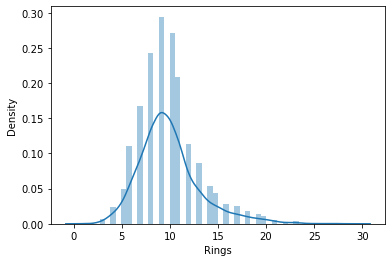

In [8]:
sns.distplot(data['Rings'])

In [9]:
##3.Bi variant Analysis

C:\Users\sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length', ylabel='Diameter'>

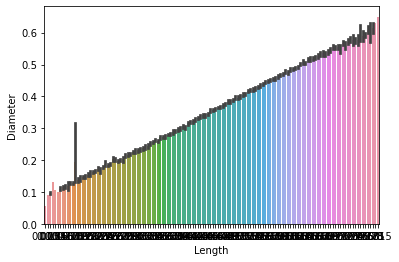

In [12]:
sns.barplot(data['Length'],data['Diameter'])

In [11]:
##3.Multi Variant Analysis

C:\Users\sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length', ylabel='Diameter'>

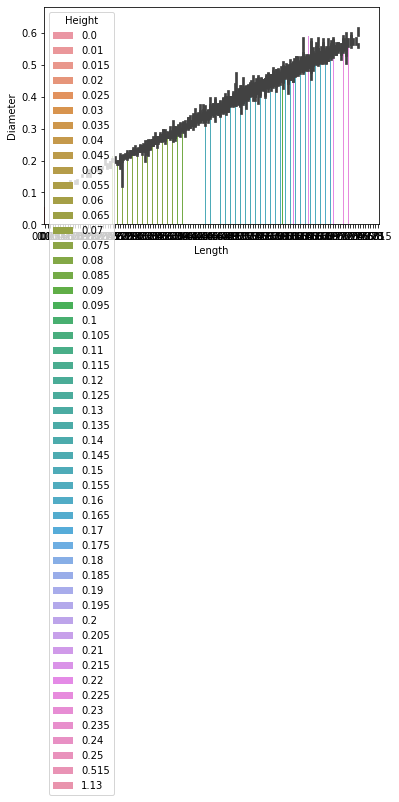

In [13]:
sns.barplot(data['Length'],data['Diameter'], hue = data['Height'])

In [14]:
##4. Descriptive Analysis

In [15]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

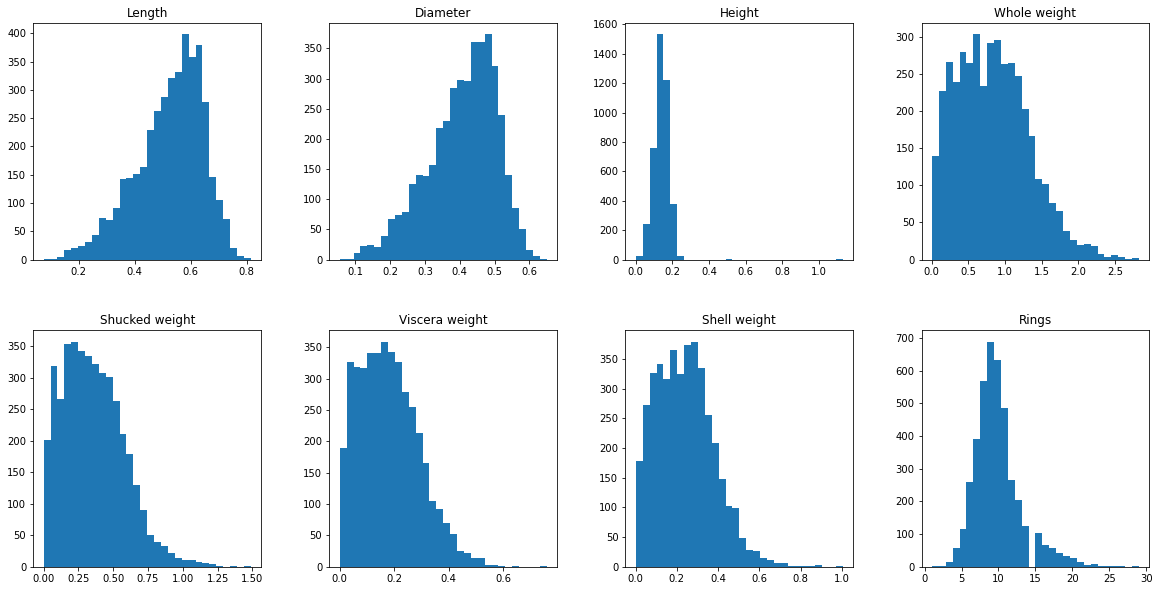

In [16]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [55]:
##5. Missing Values

In [56]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0
Sex_F,0,0.0
Sex_I,0,0.0


In [61]:
## 7.Check for Categorical columns and perform encoding.

In [65]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Length'] = le.fit_transform(data['Length'])
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [62]:
## 8. Data sheet into dependent and independent variables

In [63]:
data.iloc[:, :-1].values

array([[37.   ,  0.365,  0.095, ..., 15.   ,  0.   ,  0.   ],
       [37.   ,  0.265,  0.09 , ...,  7.   ,  0.   ,  0.   ],
       [37.   ,  0.42 ,  0.135, ...,  9.   ,  1.   ,  0.   ],
       ...,
       [37.   ,  0.43 ,  0.155, ...,  8.   ,  0.   ,  0.   ],
       [37.   ,  0.45 ,  0.165, ..., 11.   ,  1.   ,  0.   ],
       [37.   ,  0.44 ,  0.135, ..., 10.   ,  0.   ,  0.   ]])

In [64]:
data.iloc[:, -1].values

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [66]:
## 9. scaling independent values

In [68]:
from sklearn import preprocessing

 

X_data = data.Height

 

standard = preprocessing.scale(X_data)
print(standard)

[-0.81756137 -0.94996651  0.24167978 ...  0.77130035  1.03611064
  0.24167978]


In [69]:
standard

array([-0.81756137, -0.94996651,  0.24167978, ...,  0.77130035,
        1.03611064,  0.24167978])

In [70]:
## 10. split data into Training and Testing

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.05, random_state=0)


In [74]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I
2992,0,0.430,0.165,0.9845,0.4525,0.2070,0.2725,8,0,1
1792,0,0.455,0.175,1.0200,0.4805,0.2145,0.2900,9,0,0
776,0,0.385,0.145,0.6775,0.2360,0.1790,0.2000,15,0,0
46,0,0.370,0.120,0.5795,0.2930,0.2270,0.1400,9,0,0
3307,0,0.325,0.135,0.4380,0.1805,0.1165,0.1100,9,1,0
...,...,...,...,...,...,...,...,...,...,...
925,0,0.325,0.100,0.3645,0.1575,0.0825,0.1050,7,0,1
1003,0,0.455,0.150,1.0440,0.5180,0.2205,0.2700,9,0,0
2178,0,0.480,0.200,0.9750,0.3580,0.2035,0.3400,15,1,0
3458,0,0.470,0.160,1.0745,0.4925,0.2360,0.2900,8,1,0


In [78]:
X_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I
2812,0,0.170,0.050,0.0545,0.0205,0.0160,0.0155,5,0,1
3362,0,0.300,0.100,0.3010,0.1240,0.0690,0.0900,9,0,0
3835,0,0.350,0.100,0.4425,0.1750,0.0755,0.1750,7,1,0
1622,0,0.420,0.155,0.7430,0.3100,0.1860,0.2310,9,0,1
3326,0,0.415,0.135,0.8095,0.2985,0.2015,0.2800,12,0,1
...,...,...,...,...,...,...,...,...,...,...
1060,0,0.195,0.055,0.0840,0.0365,0.0175,0.0250,7,0,1
1290,0,0.380,0.120,0.6250,0.3265,0.1295,0.1600,7,0,1
1229,0,0.270,0.085,0.1875,0.0810,0.0420,0.0580,6,0,1
2197,0,0.305,0.105,0.3625,0.1565,0.0705,0.1250,10,0,1


In [86]:
## 11. Modal building

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [90]:
print(lr_train_mse)

8.986943850839652e-32


In [94]:
from random import randint
  
# the limit within which random numbers are generated
TRAIN_SET_LIMIT = 1000
  
# to create exactly 100 data items
TRAIN_SET_COUNT = 100
  
# list that contains input and corresponding output
TRAIN_INPUT = list()
TRAIN_OUTPUT = list()
  
# loop to create 100 data  items with three columns each
for i in range(TRAIN_SET_COUNT):
    a = randint(0, TRAIN_SET_LIMIT)
    b = randint(0, TRAIN_SET_LIMIT)
    c = randint(0, TRAIN_SET_LIMIT)
  
# creating the output for each data item
    op = a + (2 * b) + (3 * c)
    TRAIN_INPUT.append([a, b, c])
  
# adding each output to output list
    TRAIN_OUTPUT.append(op)

In [ ]:
##12.Train the modal

In [95]:
from sklearn.linear_model import LinearRegression
  
# Initialize the linear regression model
predictor = LinearRegression(n_jobs =-1)
  
# Fill the Model with the Data
predictor.fit(X = TRAIN_INPUT, y = TRAIN_OUTPUT)

LinearRegression(n_jobs=-1)

In [98]:
## 13. Test the modal

In [99]:
X_TEST = [[ 10, 20, 30 ]]
  
# Predict the result of X_TEST which holds testing data
outcome = predictor.predict(X = X_TEST)
  
# Predict the coefficients
coefficients = predictor.coef_
  
# Print the result obtained for the test data
print('Outcome : {}\nCoefficients : {}'.format(outcome, coefficients))

Outcome : [140.]
Coefficients : [1. 2. 3.]


In [100]:
## 6. Finding outliers and replace them

C:\Users\sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

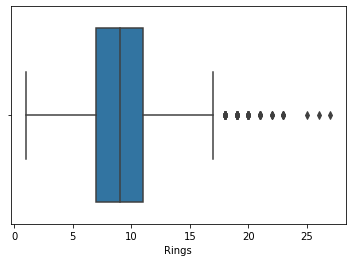

In [107]:
sns.boxplot(data['Rings'])

In [108]:
q = data.quantile([0.75,0.25])

In [109]:
q

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0.75,0.0,0.44,0.150,0.874500,0.375,0.188875,0.2550,11.0,1.0,1.0,1.0
0.25,0.0,0.32,0.105,0.343625,0.148,0.071625,0.1025,7.0,0.0,0.0,0.0


In [110]:
iqr = q.iloc[0] - q.iloc[1]

In [111]:
iqr

Length            0.000000
Diameter          0.120000
Height            0.045000
Whole weight      0.530875
Shucked weight    0.227000
Viscera weight    0.117250
Shell weight      0.152500
Rings             4.000000
Sex_F             1.000000
Sex_I             1.000000
Sex_M             1.000000
dtype: float64

In [112]:
u = q.iloc[0] + (1.5*iqr)

In [113]:
u

Length             0.000000
Diameter           0.620000
Height             0.217500
Whole weight       1.670813
Shucked weight     0.715500
Viscera weight     0.364750
Shell weight       0.483750
Rings             17.000000
Sex_F              2.500000
Sex_I              2.500000
Sex_M              2.500000
dtype: float64

In [114]:
l = q.iloc[1] - (1.5*iqr)

In [115]:
l

Length            0.000000
Diameter          0.140000
Height            0.037500
Whole weight     -0.452687
Shucked weight   -0.192500
Viscera weight   -0.104250
Shell weight     -0.126250
Rings             1.000000
Sex_F            -1.500000
Sex_I            -1.500000
Sex_M            -1.500000
dtype: float64

In [120]:
data['Rings'] = np.where(data['Rings']>14,9,data['Rings'])

C:\Users\sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

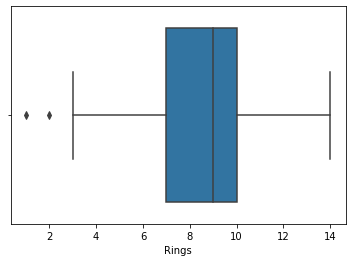

In [121]:
sns.boxplot(data['Rings'])